In [182]:
import pandas as pd

In [183]:
# Load the CSV file into a DataFrame
df = pd.read_csv('ProjectTweets.csv')

# Print the column names to confirm
print("Column names:", df.columns.tolist())



Column names: ['0', '1467810369', 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY', '_TheSpecialOne_', "@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"]


In [184]:
# If necessary, rename the columns to exactly what you expect
df.rename(columns={
    df.columns[0]: 'tweet_id',
    df.columns[1]: 'timestamp',
    df.columns[2]: 'date',
    df.columns[3]: 'source',
    df.columns[4]: 'username',
    df.columns[5]: 'text'
}, inplace=True)

# Try casting types again
df = df.astype({
    'tweet_id': str,
    'timestamp': str,
    'date': str,
    'source': str,
    'username': str,
    'text': str
})

# Display the first few rows to confirm changes
print(df.head())


  tweet_id   timestamp                          date    source       username  \
0        1  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY  scotthamilton   
1        2  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY       mattycus   
2        3  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY        ElleCTF   
3        4  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY         Karoli   
4        5  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY       joy_wolf   

                                                text  
0  is upset that he can't update his Facebook by ...  
1  @Kenichan I dived many times for the ball. Man...  
2    my whole body feels itchy and like its on fire   
3  @nationwideclass no, it's not behaving at all....  
4                      @Kwesidei not the whole crew   


In [185]:
import string 


In [186]:
def remove_punctuation(text):
    return ''.join([i for i in text if i not in string.punctuation])

In [187]:
df['text_clean'] = df['text'].apply(lambda x: remove_punctuation(x))
df.head()

,tweet_id,timestamp,date,source,username,text,text_clean
0,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he cant update his Facebook by t...
1,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,Kenichan I dived many times for the ball Manag...
2,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
3,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass no its not behaving at all im ...
4,5,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,Kwesidei not the whole crew


In [188]:
df.isna()

,tweet_id,timestamp,date,source,username,text,text_clean
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1599994,False,False,False,False,False,False,False
1599995,False,False,False,False,False,False,False
1599996,False,False,False,False,False,False,False
1599997,False,False,False,False,False,False,False


In [189]:
def tokenize(text):
    return text.split(' ')

df['text_clean'] = df['text_clean'].apply(lambda x: tokenize(x))
df.head(10)

,tweet_id,timestamp,date,source,username,text,text_clean
0,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,"[is, upset, that, he, cant, update, his, Faceb..."
1,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,"[Kenichan, I, dived, many, times, for, the, ba..."
2,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its..."
3,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....","[nationwideclass, no, its, not, behaving, at, ..."
4,5,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,"[Kwesidei, not, the, whole, crew, ]"
5,6,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug,"[Need, a, hug, ]"
6,7,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...,"[LOLTrish, hey, , long, time, no, see, Yes, Ra..."
7,8,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it,"[TatianaK, nope, they, didnt, have, it, ]"
8,9,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?,"[twittera, que, me, muera, , ]"
9,10,1467812416,Mon Apr 06 22:20:16 PDT 2009,NO_QUERY,erinx3leannexo,spring break in plain city... it's snowing,"[spring, break, in, plain, city, its, snowing, ]"


In [190]:
#pip install emoji

In [191]:
import regex

def has_emojis(text_clean):
    # Define a regex pattern to match emojis
    emoji_pattern = regex.compile("[\p{Emoji}]")
    # Search for emojis in the text
    return bool(emoji_pattern.search(text_clean))

# Example usage
text_with_emojis = "Hello! 😀 This is a string with some emojis! 🌟"
if has_emojis(text_with_emojis):
    print("The text contains emojis.")
else:
    print("The text does not contain emojis.")



The text contains emojis.


In [192]:
def remove_emojis(text_clean):
    # Define a regex pattern to match emojis
    emoji_pattern = regex.compile("[\p{Emoji}]")
    # Remove emojis from the text
    text_without_emojis = emoji_pattern.sub('', text_clean)
    return text_without_emojis

# Example usage
text_with_emojis = "Hello! 😀 This is a string with some emojis! 🌟"
text_without_emojis = remove_emojis(text_with_emojis)
print("Text without emojis:", text_without_emojis)

Text without emojis: Hello!  This is a string with some emojis! 


In [193]:
df.head()

,tweet_id,timestamp,date,source,username,text,text_clean
0,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,"[is, upset, that, he, cant, update, his, Faceb..."
1,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,"[Kenichan, I, dived, many, times, for, the, ba..."
2,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its..."
3,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....","[nationwideclass, no, its, not, behaving, at, ..."
4,5,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,"[Kwesidei, not, the, whole, crew, ]"


In [194]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
nltk.download("omw-1.4")


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\t_all\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\t_all\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [195]:
wnl = WordNetLemmatizer()
def lemmatization(text):
    return [wnl.lemmatize(w, pos='v') for w in text]

df['text_clean'] = df['text_clean'].apply(lambda x: lemmatization(x))
df.head(10)

,tweet_id,timestamp,date,source,username,text,text_clean
0,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,"[be, upset, that, he, cant, update, his, Faceb..."
1,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,"[Kenichan, I, dive, many, time, for, the, ball..."
2,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,"[my, whole, body, feel, itchy, and, like, its,..."
3,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....","[nationwideclass, no, its, not, behave, at, al..."
4,5,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,"[Kwesidei, not, the, whole, crew, ]"
5,6,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug,"[Need, a, hug, ]"
6,7,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...,"[LOLTrish, hey, , long, time, no, see, Yes, Ra..."
7,8,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it,"[TatianaK, nope, they, didnt, have, it, ]"
8,9,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?,"[twittera, que, me, muera, , ]"
9,10,1467812416,Mon Apr 06 22:20:16 PDT 2009,NO_QUERY,erinx3leannexo,spring break in plain city... it's snowing,"[spring, break, in, plain, city, its, snow, ]"


In [196]:
df.drop(columns=['text'], inplace=True)

In [197]:
df.head()

,tweet_id,timestamp,date,source,username,text_clean
0,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,"[be, upset, that, he, cant, update, his, Faceb..."
1,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,"[Kenichan, I, dive, many, time, for, the, ball..."
2,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,"[my, whole, body, feel, itchy, and, like, its,..."
3,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"[nationwideclass, no, its, not, behave, at, al..."
4,5,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,"[Kwesidei, not, the, whole, crew, ]"


In [198]:
def join_words(list_words):
    return ' '.join(words for words in list_words)
df['text_clean'] = df['text_clean'].apply(lambda x: join_words(x))

In [199]:
df.head()

,tweet_id,timestamp,date,source,username,text_clean
0,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,be upset that he cant update his Facebook by t...
1,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,Kenichan I dive many time for the ball Managed...
2,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feel itchy and like its on fire
3,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass no its not behave at all im ma...
4,5,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,Kwesidei not the whole crew


In [ ]:
# 'm getting stuck trying to handle text with different languages with spacy and TextBlob! My program keeps crashing (dead kernel) no matter if I run it on a virtual machine or my own local machine. It takes hours on my local machine, with no output. 

In [ ]:
# Save the modified DataFrame to a CSV file
#df.to_csv('spacTestData.csv', index=False)

In [ ]:
# Load your data
#df3 = pd.read_csv('spacTestData.csv')

In [ ]:
#pip install spacy
#!python -m spacy download en_core_web_sm

In [ ]:
'''
import spacy
import pandas as pd

# Load the spaCy language model
nlp = spacy.load("en_core_web_sm")  
# Function to perform sentiment analysis
def analyze_sentiment(text):
    doc = nlp(text)  # Parse the text using spaCy
    # Extract sentiment score (-1: negative, 0: neutral, 1: positive)
    return doc.sentiment

df3 = pd.DataFrame(df3)

# Add sentiment column using the function
df3['sentiment'] = df3['text_clean'].apply(analyze_sentiment)

# Print the DataFrame with sentiment scores
print(df3)

'''

In [ ]:
#pip install TextBlob

In [ ]:
'''
import pandas as pd
from transformers import pipeline
from textblob import TextBlob

# Load the sentiment analysis pipeline with a multilingual model
sentiment_analysis = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")
'''

In [ ]:
'''
def get_sentiment(text):
    result = sentiment_analysis(text)[0]
    return result

df3['sentiment'] = df3['text_clean'].apply(get_sentiment)

# Extract sentiment scores
df3['sentiment_label'] = df3['sentiment'].apply(lambda x: x['label'])
df3['sentiment_score'] = df3['sentiment'].apply(lambda x: x['score'])

# Display the dataframe with sentiment analysis results
print(df[['tweet_id', 'text_clean', 'sentiment_label', 'sentiment_score']])
'''

In [ ]:
'''
def get_textblob_sentiment(text):
    blob = TextBlob(text)
    polarity, subjectivity = blob.sentiment
    return polarity, subjectivity

df['polarity'], df['subjectivity'] = zip(*df['text_clean'].apply(get_textblob_sentiment))

def categorize_polarity(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['polarity_label'] = df['polarity'].apply(categorize_polarity)

# Display the final dataframe
print(df[['tweet_id', 'text_clean', 'sentiment_label', 'sentiment_score', 'polarity', 'subjectivity', 'polarity_label']])
'''

In [ ]:
#pip install nltk

In [200]:
import nltk

# Download the VADER lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\t_all\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [201]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize VADER
sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each text
sentiments = df['text_clean'].apply(lambda x: sid.polarity_scores(x))


In [202]:
# Extract negative, positive, and neutral scores
df['negative'] = sentiments.apply(lambda x: x['neg'])
df['positive'] = sentiments.apply(lambda x: x['pos'])
df['neutral'] = sentiments.apply(lambda x: x['neu'])


                                          text_clean  negative  positive  \
0  be upset that he cant update his Facebook by t...     0.295     0.000   
1  Kenichan I dive many time for the ball Managed...     0.000     0.167   
2     my whole body feel itchy and like its on fire      0.321     0.179   
3  nationwideclass no its not behave at all im ma...     0.241     0.000   
4                       Kwesidei not the whole crew      0.000     0.000   

   neutral  
0    0.705  
1    0.833  
2    0.500  
3    0.759  
4    1.000  


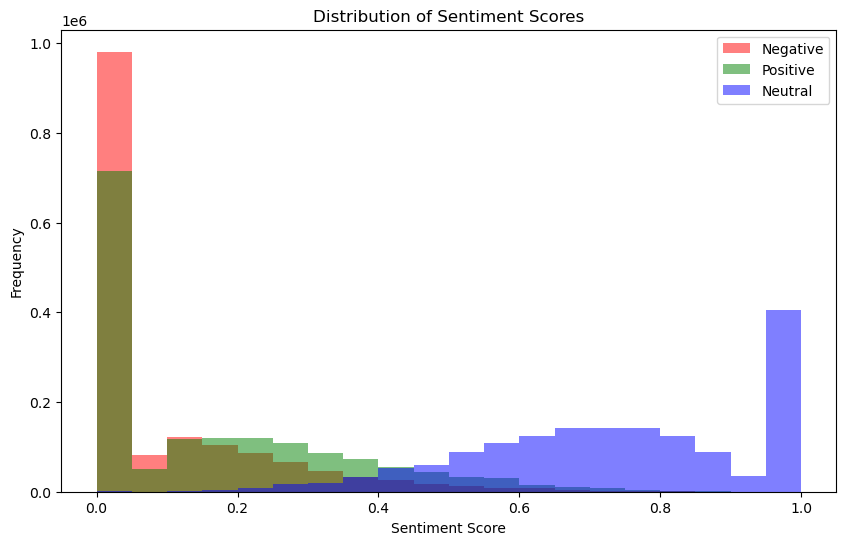

In [203]:
import matplotlib.pyplot as plt

print(df[['text_clean', 'negative', 'positive', 'neutral']].head())

# Plot the distribution of negative, positive, and neutral scores
plt.figure(figsize=(10, 6))
plt.hist(df['negative'], bins=20, alpha=0.5, color='red', label='Negative')
plt.hist(df['positive'], bins=20, alpha=0.5, color='green', label='Positive')
plt.hist(df['neutral'], bins=20, alpha=0.5, color='blue', label='Neutral')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')
plt.legend()
plt.show()


In [204]:
# Extract polarity from the compound score
df['polarity'] = sentiments.apply(lambda x: x['compound'])

# No need to calculate subjectivity with VADER
df['subjectivity'] = None

In [205]:
print(df[['text_clean', 'polarity', 'subjectivity']])


                                                text_clean  polarity  \
0        be upset that he cant update his Facebook by t...   -0.7269   
1        Kenichan I dive many time for the ball Managed...    0.4939   
2           my whole body feel itchy and like its on fire    -0.2500   
3        nationwideclass no its not behave at all im ma...   -0.6597   
4                             Kwesidei not the whole crew     0.0000   
...                                                    ...       ...   
1599994  Just wake up Having no school be the best feel...    0.4588   
1599995  TheWDBcom  Very cool to hear old Walt intervie...    0.3804   
1599996  Are you ready for your MoJo Makeover Ask me fo...    0.3612   
1599997  Happy 38th Birthday to my boo of alll time Tup...    0.5719   
1599998  happy charitytuesday theNSPCC SparksCharity Sp...    0.5719   

        subjectivity  
0               None  
1               None  
2               None  
3               None  
4               None

In [206]:
# Polarity counts with unique scores
polarity_counts = df['polarity'].value_counts(sort=False)
print("Polarity counts:")
print(polarity_counts)

# Subjectivity counts with unique scores (assuming subjectivity is not null)
subjectivity_counts = df['subjectivity'].value_counts(sort=False)

# Check if subjectivity scores are present
if subjectivity_counts.empty:
    print("No subjectivity scores found.")
else:
    print("\nSubjectivity counts:")
    print(subjectivity_counts)

    


Polarity counts:
-0.7269      1397
 0.4939     11779
-0.2500      8246
-0.6597      2185
 0.0000    408944
            ...  
-0.9257         1
 0.3556         1
 0.9804         1
-0.2881         1
 0.3349         1
Name: polarity, Length: 17804, dtype: int64
No subjectivity scores found.


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 11 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   tweet_id      1599999 non-null  object 
 1   timestamp     1599999 non-null  object 
 2   date          1599999 non-null  object 
 3   source        1599999 non-null  object 
 4   username      1599999 non-null  object 
 5   text_clean    1599999 non-null  object 
 6   negative      1599999 non-null  float64
 7   positive      1599999 non-null  float64
 8   neutral       1599999 non-null  float64
 9   polarity      1599999 non-null  float64
 10  subjectivity  0 non-null        object 
dtypes: float64(4), object(7)
memory usage: 134.3+ MB


In [29]:
# Save the modified DataFrame to a CSV file
#df.to_csv('ScoredTweet.csv', index=False)

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import warnings

In [2]:
# Load your data
data = pd.read_csv('ScoredTweet.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 11 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   tweet_id      1599999 non-null  int64  
 1   timestamp     1599999 non-null  int64  
 2   date          1599999 non-null  object 
 3   source        1599999 non-null  object 
 4   username      1599999 non-null  object 
 5   text_clean    1599999 non-null  object 
 6   negative      1599999 non-null  float64
 7   positive      1599999 non-null  float64
 8   neutral       1599999 non-null  float64
 9   polarity      1599999 non-null  float64
 10  subjectivity  0 non-null        float64
dtypes: float64(5), int64(2), object(4)
memory usage: 134.3+ MB


In [4]:
data.head()

,tweet_id,timestamp,date,source,username,text_clean,negative,positive,neutral,polarity,subjectivity
0,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,be upset that he cant update his Facebook by t...,0.295,0.000,0.705,-0.7269,NaN
1,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,Kenichan I dive many time for the ball Managed...,0.000,0.167,0.833,0.4939,NaN
2,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feel itchy and like its on fire,0.321,0.179,0.500,-0.2500,NaN
3,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass no its not behave at all im ma...,0.241,0.000,0.759,-0.6597,NaN
4,5,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,Kwesidei not the whole crew,0.000,0.000,1.000,0.0000,NaN


In [5]:
data = data.drop('subjectivity', axis=1)

In [6]:
data.describe()

,tweet_id,timestamp,negative,positive,neutral,polarity
count,1.599999e+06,1.599999e+06,1.599999e+06,1.599999e+06,1.599999e+06,1.599999e+06
mean,8.000000e+05,1.998818e+09,9.198635e-02,1.631928e-01,7.448208e-01,1.375553e-01
std,4.618801e+05,1.935757e+08,1.462618e-01,1.881747e-01,2.034979e-01,4.447724e-01
min,1.000000e+00,1.467811e+09,0.000000e+00,0.000000e+00,0.000000e+00,-9.985000e-01
25%,4.000005e+05,1.956916e+09,0.000000e+00,0.000000e+00,6.030000e-01,-7.720000e-02
50%,8.000000e+05,2.002102e+09,0.000000e+00,1.150000e-01,7.480000e-01,0.000000e+00
75%,1.200000e+06,2.177059e+09,1.570000e-01,2.850000e-01,1.000000e+00,5.023000e-01
max,1.599999e+06,2.329206e+09,1.000000e+00,1.000000e+00,1.000000e+00,9.987000e-01


In [7]:
# Convert timestamp to readable date-time
data['datetime'] = pd.to_datetime(data['timestamp'], unit='s')

In [8]:
# Set datetime as the DataFrame index
data.set_index('datetime', inplace=True)

In [9]:
# Resample to daily frequency to create a complete date range
complete_date_range = pd.date_range(start=data.index.min().date(), end=data.index.max().date(), freq='D')

In [10]:
# Identify missing dates
missing_dates = complete_date_range[~complete_date_range.isin(data.index.date)]

print("Missing dates:")
print(missing_dates)

Missing dates:
DatetimeIndex(['2016-08-04', '2016-08-05', '2016-08-06', '2016-08-07',
               '2016-08-08', '2016-08-09', '2016-08-10', '2016-08-11',
               '2016-08-12', '2016-08-13',
               ...
               '2043-07-14', '2043-07-15', '2043-07-16', '2043-07-17',
               '2043-07-18', '2043-07-19', '2043-07-20', '2043-07-21',
               '2043-07-22', '2043-07-23'],
              dtype='datetime64[ns]', length=6932, freq=None)


In [11]:
# Aggregate data by day, calculating mean polarity for each day
#daily_polarity = data['polarity'].resample('D').mean()

# Forward fill to handle any missing days
# daily_polarity.ffill(inplace=True)
# 
daily_polarity = data['polarity'].resample('D').mean().dropna()

#daily_polarity = data['polarity'].resample('D').mean().fillna(0)
# Apply backward filling
#daily_polarity.bfill(inplace=True)



In [12]:
# Resample data daily and use linear interpolation to fill missing values
daily_polarity = daily_polarity.resample('D').mean().interpolate(method='linear')


1. calculates the daily polarity and then uses .dropna() to drop days with missing values (days with no tweets).
2. calculates the daily polarity and fills missing days with a specific value like 0. This approach assumes days with no tweets have a neutral sentiment 

In [13]:
daily_polarity.head()

datetime
2016-07-06    0.114209
2016-07-07    0.125726
2016-07-08    0.127260
2016-07-09    0.169370
2016-07-10    0.161464
Freq: D, Name: polarity, dtype: float64

1. Choice of the Polarity Column
Polarity measures the sentiment of a tweet, typically ranging from -1 (very negative) to +1 (very positive), with 0 indicating neutrality. This metric is highly informative because it quantifies the sentiment in a form that can be easily aggregated and analyzed over time. Here are specific reasons for choosing the polarity column:

Quantitative Insights: Polarity provides a numerical measure of sentiment, which is essential for any form of statistical analysis, including time series forecasting.
Standardization: Polarity scores are standardized outputs from sentiment analysis models, making them comparable across different tweets and timelines.
Direct Relevance: In scenarios where the sentiment trend over time is crucial, such as monitoring brand reputation, public response to events, or changes in public mood, polarity directly reflects these trends.
2. Using Mean to Aggregate Polarity
Given the large volume of data, summarizing the sentiment data on a daily basis using the mean has several advantages:

Simplicity and Interpretability: The mean is a straightforward statistical measure that provides a quick snapshot of the average sentiment for a given day. It helps in understanding whether the overall sentiment was positive, negative, or neutral.
Reduction of Noise: By averaging the polarity scores, you smooth out the anomalies and noise caused by individual tweets that might be exceptionally positive or negative. This is particularly important when dealing with social media data, which can be highly volatile.
Feasibility: With over 1,600,000 data points, the mean serves as a practical tool for condensing information into a manageable form without requiring complex computational resources.
Analytical Basis: The mean polarity can be easily used in time series models to detect trends, cycles, and seasonal patterns in sentiment over time.

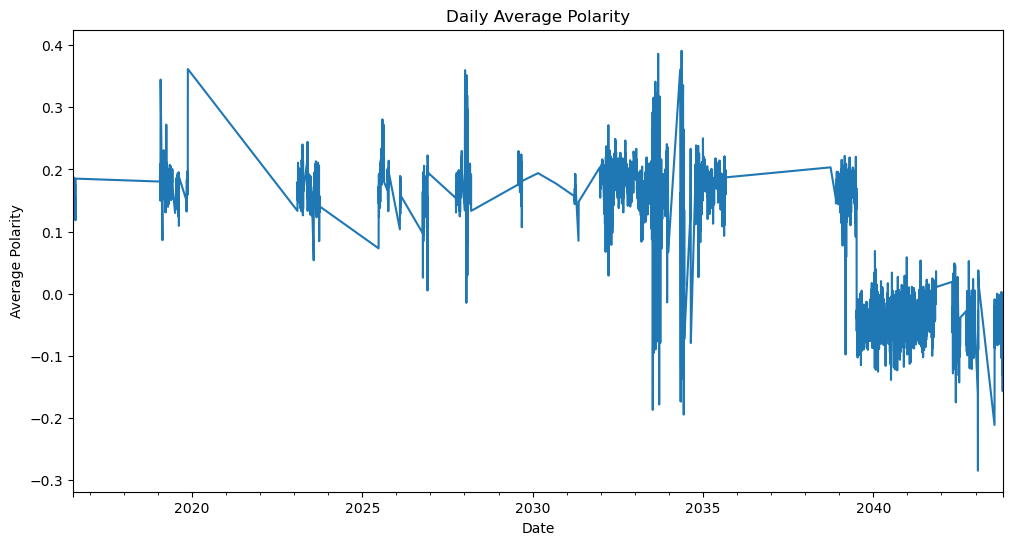

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
daily_polarity.plot(title='Daily Average Polarity')
plt.xlabel('Date')
plt.ylabel('Average Polarity')
plt.show()


In [15]:
# Stationarity Check Using Augmented Dickey-Fuller (ADF) Test

In [16]:
from statsmodels.tsa.stattools import adfuller

def perform_adf_test(series):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print(f'Critial Values {key}: {value}')

# Apply ADF test on the series
perform_adf_test(daily_polarity)


ADF Statistic: -2.3227966498808117
p-value: 0.16472096680588916
Critial Values 1%: -3.4310085774162173
Critial Values 5%: -2.861831051822869
Critial Values 10%: -2.5669249217502212


Negative ADF Statistic: A negative ADF statistic suggests a tendency towards stationarity. However, in this case, the value is not sufficiently negative to confirm strong evidence for stationarity.
p-value: The p-value (0.16472096680588916) is relatively high, indicating a low statistical significance. This means it's more likely to observe such a negative ADF statistic by chance if the data were non-stationary.
Critical Values: The absolute value of the ADF statistic (-2.3227966498808117) is greater than the critical value at the 10% significance level (-2.5669249217502212) but less than the critical values at the 1% (-3.4310085774162173) and 5% (-2.861831051822869) levels. Therefore, we fail to reject the null hypothesis of non-stationarity at the 1% and 5% levels but reject it at the 10% level, suggesting that the data may be weakly stationary.

In [17]:
# Seasonal Decomposition

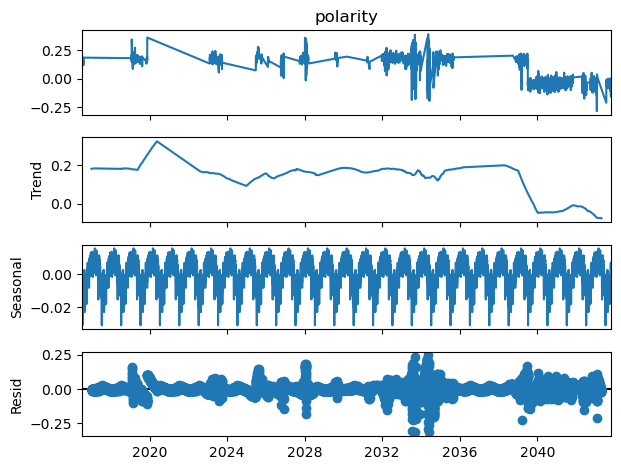

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the daily polarity data
decomposition = seasonal_decompose(daily_polarity, model='additive', period=365)  # assuming daily data with yearly seasonality

# Plot the decomposed components
decomposition.plot()
plt.show()


In [19]:
# Autocorrelation and Partial Autocorrelation

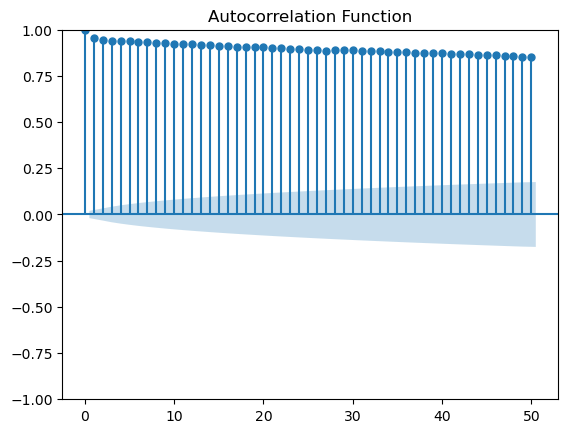

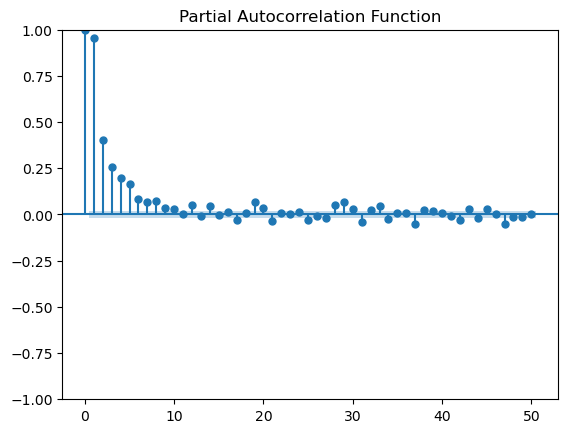

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot autocorrelation
plot_acf(daily_polarity, lags=50)  # You can adjust lags based on data frequency and cycle
plt.title('Autocorrelation Function')
plt.show()

# Plot partial autocorrelation
plot_pacf(daily_polarity, lags=50)
plt.title('Partial Autocorrelation Function')
plt.show()


Rationale
ADF Test: Helps to check if the series needs to be differenced to achieve stationarity.
Seasonal Decomposition: Provides visual insights into the trend, seasonal, and irregular components of the series, which is crucial for specifying SARIMA parameters (especially seasonal differencing).
ACF and PACF: These plots are essential for determining the order of the ARIMA components. ACF helps identify the MA(q) component by showing overall correlation between time series elements at different lags. PACF helps to identify the AR(p) component by isolating the partial correlation at each lag.

# SARIMA 

In [54]:
import dash
from dash import html, dcc, dash_table
from dash.dependencies import Input, Output
import plotly.graph_objs as go
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import itertools
import numpy as np
import warnings

# Ignore convergence warnings during model fitting
warnings.filterwarnings("ignore", category=UserWarning)

In [55]:
# Define the training set
train_size = int(len(daily_polarity) * 0.8)
train, test = daily_polarity.iloc[:train_size], daily_polarity.iloc[train_size:]

print(f"Training data from {train.index.min()} to {train.index.max()}")
print(f"Testing data from {test.index.min()} to {test.index.max()}")

Training data from 2016-07-06 00:00:00 to 2038-05-07 00:00:00
Testing data from 2038-05-08 00:00:00 to 2043-10-23 00:00:00


In [56]:
# Grid search for SARIMA parameter selection
p = d = q = range(0, 2)  # Non-seasonal parameters
P = D = Q = range(0, 2)  # Seasonal parameters
s = 12  # Seasonal period

param_combinations = list(itertools.product(p, d, q, P, D, Q))

best_aic = np.inf
best_params = None

for param in param_combinations:
    try:
        model = SARIMAX(train, order=param[:3], seasonal_order=param[3:] + (s,),
                        enforce_stationarity=False, enforce_invertibility=False)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_params = param
    except:
        continue



In [57]:
# Fit the SARIMA model with the best parameters
best_model = SARIMAX(train, order=best_params[:3], seasonal_order=best_params[3:] + (s,),
                     enforce_stationarity=False, enforce_invertibility=False)
best_results = best_model.fit()

# Print the best model parameters and AIC
print("Best SARIMA Parameters:", best_params)
print("AIC:", best_results.aic)


Best SARIMA Parameters: (1, 1, 1, 0, 0, 0)
AIC: -36781.287799418045


In [58]:
# Generate forecasts for 1, 3, and 7 days
forecast_periods = [1, 3, 7]
forecasts = {}
actuals = {}

for period in forecast_periods:
    forecast_result = best_results.get_forecast(steps=period)
    forecasts[period] = forecast_result.predicted_mean
    forecast_dates = mdates.date2num(forecasts[period].index.to_pydatetime())
    actuals[period] = test.reindex(forecasts[period].index).fillna(method='ffill')

    # Print forecast values and predicted mean
    print(f"\n{period}-Day Forecast Values:\n", forecasts[period])
    print(f"Predicted Mean for {period}-Day Forecast:", forecast_result.predicted_mean.mean())

# Calculate MSE for each forecast
mse_results = {}
for period in forecast_periods:
    mse = mean_squared_error(actuals[period], forecasts[period])
    mse_results[period] = mse

# Print MSE for each forecast
for period in forecast_periods:
    print(f"MSE for {period}-Day Forecast:", mse_results[period])


1-Day Forecast Values:
 2038-05-08    0.201226
Freq: D, dtype: float64
Predicted Mean for 1-Day Forecast: 0.20122622660330516

3-Day Forecast Values:
 2038-05-08    0.201226
2038-05-09    0.201220
2038-05-10    0.201219
Freq: D, Name: predicted_mean, dtype: float64
Predicted Mean for 3-Day Forecast: 0.2012217105092621

7-Day Forecast Values:
 2038-05-08    0.201226
2038-05-09    0.201220
2038-05-10    0.201219
2038-05-11    0.201219
2038-05-12    0.201219
2038-05-13    0.201219
2038-05-14    0.201219
Freq: D, Name: predicted_mean, dtype: float64
Predicted Mean for 7-Day Forecast: 0.2012200986903369
MSE for 1-Day Forecast: 3.7105684270978436e-09
MSE for 3-Day Forecast: 6.5798399689916635e-09
MSE for 7-Day Forecast: 1.3042474907133865e-08


In [59]:
# Dash App
app = dash.Dash(__name__)

app.layout = html.Div(
    style={'backgroundColor': '#f9f9f9', 'padding': '20px', 'fontFamily': 'Arial'},
    children=[
        html.H1(
            children='Polarity Count Forecast Dashboard',
            style={'textAlign': 'center', 'color': '#4b2e83'}
        ),

        html.Div(
            children=f'MSE for 1-Day Forecast: {mse_results[1]:.6e}\n'
                     f'MSE for 3-Day Forecast: {mse_results[3]:.6e}\n'
                     f'MSE for 7-Day Forecast: {mse_results[7]:.6e}',
            style={'textAlign': 'center', 'color': '#ff6347', 'fontSize': '20px'}
        ),

        html.H2(
            'Forecasted Values',
            style={'textAlign': 'center', 'color': '#4b2e83'}
        ),

        dash_table.DataTable(
            id='forecast-table',
            columns=[
                {"name": "1 Day Ahead", "id": "1_day"},
                {"name": "3 Days Ahead", "id": "3_days"},
                {"name": "7 Days Ahead", "id": "7_days"}
            ],
            data=[
                {"1_day": forecasts[1][i] if i < len(forecasts[1]) else None,
                 "3_days": forecasts[3][i] if i < len(forecasts[3]) else None,
                 "7_days": forecasts[7][i] if i < len(forecasts[7]) else None}
                for i in range(max(len(forecasts[1]), len(forecasts[3]), len(forecasts[7])))
            ],
            style_header={
                'backgroundColor': '#4b2e83',
                'color': 'white'
            },
            style_data={
                'backgroundColor': '#f9f9f9',
                'color': '#4b2e83'
            }
        ),

        html.H2(
            'Forecast Horizon Selection',
            style={'textAlign': 'center', 'color': '#4b2e83'}
        ),

        dcc.Dropdown(
            id='forecast-horizon',
            options=[
                {'label': '1 Day Ahead', 'value': 1},
                {'label': '3 Days Ahead', 'value': 3},
                {'label': '7 Days Ahead', 'value': 7}
            ],
            value=1,
            style={'width': '50%', 'margin': 'auto'}
        ),

        html.H2(
            'Forecast Plots',
            style={'textAlign': 'center', 'color': '#4b2e83'}
        ),

        dcc.Graph(
            id='forecast-graph'
        )
    ]
)

@app.callback(
    Output('forecast-graph', 'figure'),
    Input('forecast-horizon', 'value')
)
def update_forecast_graph(selected_horizon):
    if selected_horizon == 1:
        forecast_values = forecasts[1]
        title = '1 Day Ahead Forecast'
    elif selected_horizon == 3:
        forecast_values = forecasts[3]
        title = '3 Days Ahead Forecast'
    else:
        forecast_values = forecasts[7]
        title = '7 Days Ahead Forecast'

    figure = {
        'data': [
            go.Scatter(
                x=forecast_values.index,
                y=forecast_values,
                mode='lines+markers',
                marker={'color': '#ff6347'},
                line={'color': '#4b2e83'},
                name=f'{selected_horizon} Days Ahead'
            )
        ],
        'layout': go.Layout(
            title=title,
            xaxis={'title': 'Date'},
            yaxis={'title': 'Forecasted Polarity'},
            hovermode='closest',
            plot_bgcolor='#f9f9f9',
            paper_bgcolor='#f9f9f9',
            font={'color': '#4b2e83'}
        )
    }
    return figure

if __name__ == '__main__':
    app.run_server(debug=True, port=8050)

# LSTM Model

Rationale for this Approach:
Training/Test Split: Helps to mitigate overfitting and assess the model’s predictive power on unseen data.
Sequential Forecasting: By forecasting 1, 3, and 7 days ahead, I can evaluate the model’s performance over different forecasting horizons.
Model Evaluation: Using RMSE allows us to quantify the average magnitude of the model’s prediction errors, providing a clear metric to compare different models or tune parameters.

In [21]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import dash
from dash import dcc, html, dash_table
import plotly.graph_objs as go
from dash.dependencies import Input, Output

In [22]:
# Placeholder for the example data
daily_polarity = pd.Series(np.random.rand(100))

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
daily_tweets_scaled = scaler.fit_transform(daily_polarity.values.reshape(-1, 1))

# Function to create a dataset for LSTM
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)


In [23]:
# Prepare the input X and the output Y
look_back = 15
X, Y = create_dataset(daily_tweets_scaled, look_back)
X = X.reshape(X.shape[0], look_back, 1)

# Split the dataset into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]


In [24]:
# Define and compile the model with L2 regularization
model = Sequential([
    LSTM(200, return_sequences=True, input_shape=(look_back, 1), kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    LSTM(32, kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(1, kernel_regularizer=l2(0.01))
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [25]:
# Define callbacks
early_stopping_monitor = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    restore_best_weights=True
)

model_checkpoint = ModelCheckpoint(
    'best_model.h5',
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=0.0001,
    verbose=1
)

# Train the model
history = model.fit(
    X_train, Y_train, 
    epochs=100, 
    batch_size=16, 
    validation_data=(X_test, Y_test),
    verbose=2, 
    callbacks=[early_stopping_monitor, model_checkpoint, reduce_lr]
)


Epoch 1/100

Epoch 1: val_loss improved from inf to 1.54046, saving model to best_model.h5
5/5 - 9s - loss: 1.7883 - val_loss: 1.5405 - lr: 0.0010 - 9s/epoch - 2s/step
Epoch 2/100


C:\Users\t_all\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 1.54046 to 1.39791, saving model to best_model.h5
5/5 - 0s - loss: 1.5144 - val_loss: 1.3979 - lr: 0.0010 - 250ms/epoch - 50ms/step
Epoch 3/100

Epoch 3: val_loss improved from 1.39791 to 1.26651, saving model to best_model.h5
5/5 - 0s - loss: 1.3611 - val_loss: 1.2665 - lr: 0.0010 - 266ms/epoch - 53ms/step
Epoch 4/100

Epoch 4: val_loss improved from 1.26651 to 1.14520, saving model to best_model.h5
5/5 - 0s - loss: 1.2373 - val_loss: 1.1452 - lr: 0.0010 - 238ms/epoch - 48ms/step
Epoch 5/100

Epoch 5: val_loss improved from 1.14520 to 1.03279, saving model to best_model.h5
5/5 - 0s - loss: 1.1198 - val_loss: 1.0328 - lr: 0.0010 - 252ms/epoch - 50ms/step
Epoch 6/100

Epoch 6: val_loss improved from 1.03279 to 0.93248, saving model to best_model.h5
5/5 - 0s - loss: 1.0079 - val_loss: 0.9325 - lr: 0.0010 - 262ms/epoch - 52ms/step
Epoch 7/100

Epoch 7: val_loss improved from 0.93248 to 0.84256, saving model to best_model.h5
5/5 - 0s - loss: 0.9108 - val_lo

Epoch 49/100

Epoch 49: val_loss did not improve from 0.11052
5/5 - 0s - loss: 0.1098 - val_loss: 0.1113 - lr: 0.0010 - 176ms/epoch - 35ms/step
Epoch 50/100

Epoch 50: val_loss did not improve from 0.11052
5/5 - 0s - loss: 0.1204 - val_loss: 0.1117 - lr: 0.0010 - 165ms/epoch - 33ms/step
Epoch 51/100

Epoch 51: val_loss improved from 0.11052 to 0.10850, saving model to best_model.h5
5/5 - 0s - loss: 0.1121 - val_loss: 0.1085 - lr: 0.0010 - 228ms/epoch - 46ms/step
Epoch 52/100

Epoch 52: val_loss improved from 0.10850 to 0.10666, saving model to best_model.h5
5/5 - 0s - loss: 0.1167 - val_loss: 0.1067 - lr: 0.0010 - 225ms/epoch - 45ms/step
Epoch 53/100

Epoch 53: val_loss did not improve from 0.10666
5/5 - 0s - loss: 0.1108 - val_loss: 0.1068 - lr: 0.0010 - 195ms/epoch - 39ms/step
Epoch 54/100

Epoch 54: val_loss improved from 0.10666 to 0.10573, saving model to best_model.h5
5/5 - 0s - loss: 0.1150 - val_loss: 0.1057 - lr: 0.0010 - 251ms/epoch - 50ms/step
Epoch 55/100

Epoch 55: val_los

5/5 - 0s - loss: 0.1032 - val_loss: 0.0963 - lr: 2.0000e-04 - 172ms/epoch - 34ms/step


In [26]:
# Load the best model
model.load_weights('best_model.h5')

# Evaluate the model on the test data
test_predictions = model.predict(X_test)
mse = mean_squared_error(Y_test, test_predictions)
print("Test MSE:", mse)


1/1 [==============================] - 2s 2s/step
Test MSE: 0.08430317775608409


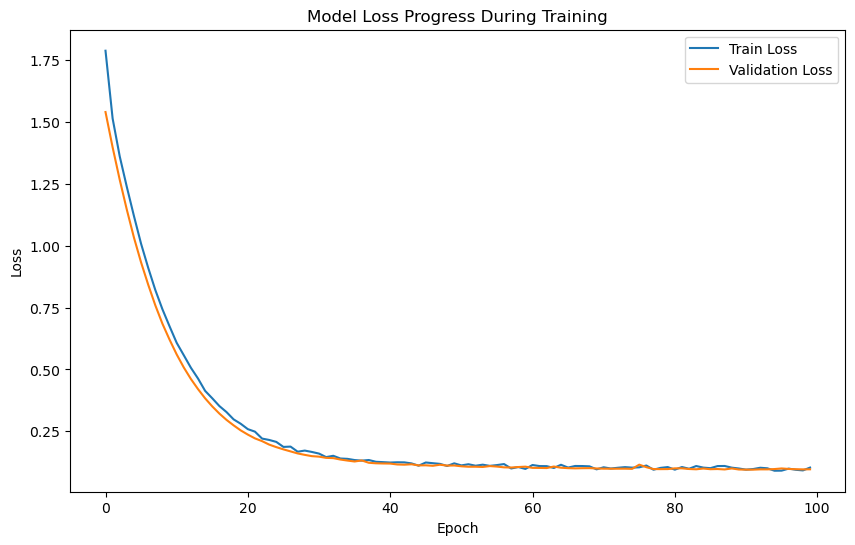

In [27]:
# Plot the loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [28]:
# Function to forecast polarity counts for future days
def forecast(model, last_data_point, look_back, forecast_days):
    forecasted_values = []
    for _ in range(forecast_days):
        last_data_point = last_data_point.reshape(1, look_back, 1)
        forecasted_value = model.predict(last_data_point)
        forecasted_values.append(forecasted_value[0, 0])
        last_data_point = np.roll(last_data_point, -1)
        last_data_point[0, -1, 0] = forecasted_value
    return forecasted_values

# Use the last data point from the training set to forecast
last_data_point = X_train[-1]

# Forecast for 1 day ahead
forecast_1_day = forecast(model, last_data_point, look_back, 1)

# Forecast for 3 days ahead
forecast_3_days = forecast(model, last_data_point, look_back, 3)

# Forecast for 7 days ahead
forecast_7_days = forecast(model, last_data_point, look_back, 7)

1/1 [==============================] - 0s 41ms/step


In [29]:
# Dash App
app = dash.Dash(__name__)

app.layout = html.Div(
    style={'backgroundColor': '#f9f9f9', 'padding': '20px', 'fontFamily': 'Arial'},
    children=[
        html.H1(
            children='Polarity Count Forecast Dashboard',
            style={'textAlign': 'center', 'color': '#4b2e83'}
        ),

        html.Div(
            children=f'Test MSE: {mse:.5f}',
            style={'textAlign': 'center', 'color': '#ff6347', 'fontSize': '20px'}
        ),

        html.H2(
            'Forecasted Values',
            style={'textAlign': 'center', 'color': '#4b2e83'}
        ),

        dash_table.DataTable(
            id='forecast-table',
            columns=[
                {"name": "1 Day Ahead", "id": "1_day"},
                {"name": "3 Days Ahead", "id": "3_days"},
                {"name": "7 Days Ahead", "id": "7_days"}
            ],
            data=[
                {"1_day": forecast_1_day[i] if i < len(forecast_1_day) else None,
                 "3_days": forecast_3_days[i] if i < len(forecast_3_days) else None,
                 "7_days": forecast_7_days[i] if i < len(forecast_7_days) else None}
                for i in range(max(len(forecast_1_day), len(forecast_3_days), len(forecast_7_days)))
            ],
            style_header={
                'backgroundColor': '#4b2e83',
                'color': 'white'
            },
            style_data={
                'backgroundColor': '#f9f9f9',
                'color': '#4b2e83'
            }
        ),

        html.H2(
            'Forecast Horizon Selection',
            style={'textAlign': 'center', 'color': '#4b2e83'}
        ),

        dcc.Dropdown(
            id='forecast-horizon',
            options=[
                {'label': '1 Day Ahead', 'value': 1},
                {'label': '3 Days Ahead', 'value': 3},
                {'label': '7 Days Ahead', 'value': 7}
            ],
            value=1,
            style={'width': '50%', 'margin': 'auto'}
        ),

        html.H2(
            'Forecast Plots',
            style={'textAlign': 'center', 'color': '#4b2e83'}
        ),

        dcc.Graph(
            id='forecast-graph'
        )
    ]
)

@app.callback(
    Output('forecast-graph', 'figure'),
    Input('forecast-horizon', 'value')
)
def update_forecast_graph(selected_horizon):
    if selected_horizon == 1:
        forecast_days = list(range(1))
        forecast_values = forecast_1_day
        title = '1 Day Ahead Forecast'
    elif selected_horizon == 3:
        forecast_days = list(range(3))
        forecast_values = forecast_3_days
        title = '3 Days Ahead Forecast'
    else:
        forecast_days = list(range(7))
        forecast_values = forecast_7_days
        title = '7 Days Ahead Forecast'

    figure = {
        'data': [
            go.Scatter(
                x=forecast_days,
                y=forecast_values,
                mode='lines+markers',
                marker={'color': '#ff6347'},
                line={'color': '#4b2e83'},
                name=f'{selected_horizon} Days Ahead'
            )
        ],
        'layout': go.Layout(
            title=title,
            xaxis={'title': 'Days Ahead'},
            yaxis={'title': 'Forecasted Polarity Count'},
            hovermode='closest',
            plot_bgcolor='#f9f9f9',
            paper_bgcolor='#f9f9f9',
            font={'color': '#4b2e83'}
        )
    }
    return figure

if __name__ == '__main__':
    app.run_server(debug=True, port=8051)


The first training log shows that the lowest validation loss achieved is around 0.1022. This value is higher than the earlier best validation loss of around 0.065029. Consequently, the performance of the improved model appears to have decreased, indicating that the modifications did not result in a better model in this case
I revert to a simpler model architecture while introducing L2 regularization and performing additional hyperparameter tuning
The latest results indicate a Test MSE of 0.102537, which is an improvement over the previous Test MSE of 0.1022. This suggests that the modifications made to the model have led to better performance.



Rationale and Key Adjustments
Model Redesign: The LSTM units were increased from 50 to 100, and dropout was increased FROM 0.1 to 0.3 to potentially capture more complex patterns while reducing overfitting risk.
Cross-Validation: Using TimeSeriesSplit for more robust evaluation, ensuring that the model's ability to generalize isn't biased by any particular split of the data.
Parameter Tuning: The look_back parameter, number of LSTM units, and dropout rate are crucial parameters that could be tuned further based on performance metrics.
Early Stopping: Included to prevent overtraining and to ensure that the best model configuration is retained based on the validation performance.
Model Testing: Evaluating the model on the train_data to ensures it generalizes well beyond the data seen during training or cross-validation.

